In [1]:
import numpy as np 
from scipy.io import loadmat
import sys 
import os

def set_path():
    if sys.platform == 'darwin':
        print("Current system is macOS")
        main_fold_path = '/Users/shanxiafeng/Documents/Project/Research/fnirs-prognosis/code/fnirs-treatment-response-prediction'
    elif sys.platform == 'linux':
        print("Current system is Ubuntu")
        main_fold_path = '/home/jy/Documents/fnirs/treatment_response/fnirs-depression-deeplearning'
    else:
        print("Current system is neither macOS nor Ubuntu")
    os.chdir(main_fold_path)
set_path()

data_fold = 'Prerequisite/data_all_original'

Hb_types = ['HbO', 'HbR', 'HbT']

# test one 

data_pth = 'Prerequisite/data_all_original/Fabeha_s Data/All 52-channel/all52CH_prep_HbO.mat'
data = loadmat(data_pth)

# conda create -n tf python==3.9
# conda init
# conda activate tf

# pip install scikit-learn==0.24.1 matplotlib==3.3.4 QtPy==1.9.0 jupyter==1.0.0
# pip install Keras==2.12.0 numpy==1.22.4 pandas==1.2.4 wandb==0.15.11
# pip install tensorflow-addons==0.20.0 tensorflow[and-cuda]==2.12.0
# pip install PyWavelets==1.4.1 xgboost==2.0.1 scipy==1.9.1
# pip install statsmodels==0.14.1 hyperopt==0.2.7 shap==0.43.0
# pip install chord==6.0.1 pingouin==0.5.4112312312312111222222222222

def read_hb_data_label(data): 
    hb_data = data.get('data_hb')
    label = data.get('label')
    return hb_data, label

    
def loop_data_path_hb_type(data_pth):
    all_hb_data, label = [], []
    for hb_type in Hb_types:
        path = data_pth + f'/all52CH_prep_{hb_type}.mat'
        print(path)
        data = loadmat(path)
        hb_data, label = read_hb_data_label(data)
        all_hb_data.append(hb_data)
        label = label
    return all_hb_data, label
        


# correct channel 
def correct_channel(data):
    map_location = 'allData/diagnosis/Channel_Configuration.mat'
    channel_map = loadmat(map_location)
    all_channel = [ch[0] for ch in channel_map['Channel'][0][0][0][0]] # ['C29', 'C39', 'C18', 'C28', 'C30', 'C31', 'C41', 'C20', 'C43', 'C32', 'C44', 'C45', 'C34', 'C46', 'C47', 'C36', 'C48', 'C49', 'C38', 'C40', 'C50', 'C51', 'C42', 'C52', 'C1', 'C11', 'C2', 'C3', 'C13', 'C4', 'C5', 'C15', 'C6', 'C7', 'C17', 'C19', 'C8', 'C9', 'C21', 'C10', 'C12', 'C33', 'C22', 'C23', 'C35', 'C14', 'C24', 'C25', 'C37', 'C16', 'C26', 'C27']
    correct_location = [all_channel.index('C'+str(i)) for i in range(1, 53)] # [index_of_'C1', index_of_'C2', index_of_'C3', ...]
    data = data[:, correct_location, ...]
    return data


save_fold = 'allData/diagnosis514/'        
dataset_1_pth = 'Prerequisite/data_all_original/Gabrielle_s Data/All 52-channel/'        
dataset_2_pth = 'Prerequisite/data_all_original/Fabeha_s Data/All 52-channel/'        



hb_data_dataset1, label_dataset1 = loop_data_path_hb_type(dataset_1_pth)
hb_data_dataset2, label_dataset2 = loop_data_path_hb_type(dataset_2_pth)

hb_data_dataset1 = np.array(hb_data_dataset1)
hb_data_dataset2 = np.array(hb_data_dataset2)
hb_data_all = np.concatenate((hb_data_dataset1, hb_data_dataset2), axis=1)
hb_data_all = np.transpose(hb_data_all, (1,2,3,0))

label_dataset1 = np.array(label_dataset1)
label_dataset2 = np.array(label_dataset2)
label_all = np.concatenate((label_dataset1, label_dataset2), axis=0)[:, 0]


# delete data with index 32 in gabreille
# Gabrielle - CT-033 == 32 -index delete it
# Fabeha has 374, Gabrielle has 141, fabrielle will be the first 
delete_index = 32
hb_data_all = np.delete(hb_data_all, delete_index, axis=0)
label_all = np.delete(label_all, delete_index, axis=0)


hb_data_all = correct_channel(hb_data_all)

hb_data_all_3d = hb_data_all
# normalize data by dividing by mean values, and concatenate them together
# hb_data_all = np.concatenate([hb_data_all[..., i] / np.mean(hb_data_all[..., i]) for i in range(3)], axis=2)
hb_data_all = np.concatenate([hb_data_all_3d[..., i] for i in range(3)], axis=2)

# me


# save data
np.save(save_fold + 'hb_data.npy', hb_data_all)
np.save(save_fold + 'label.npy', label_all)


def avg_ten_points(hb):
    hb = np.mean(hb.reshape(hb.shape[0], hb.shape[1], hb.shape[2]//10, 10), axis=-1)
    return hb

# average along -1 by every 10pionts 
hbo = avg_ten_points(hb_data_all_3d[...,:-1,0])

hbr = avg_ten_points(hb_data_all_3d[...,:-1,1])

print(hbr.shape)
hbt = avg_ten_points(hb_data_all_3d[...,:-1,2])
np.save(save_fold + 'hbo_simple_data.npy', hbo)

hb_simple_3d = np.concatenate([hbo[..., np.newaxis], hbr[..., np.newaxis], hbt[..., np.newaxis]], axis=-1)
np.save(save_fold + 'hb_simple_3d.npy', hb_simple_3d)




hbo.shape

Current system is Ubuntu


Prerequisite/data_all_original/Gabrielle_s Data/All 52-channel//all52CH_prep_HbO.mat
Prerequisite/data_all_original/Gabrielle_s Data/All 52-channel//all52CH_prep_HbR.mat
Prerequisite/data_all_original/Gabrielle_s Data/All 52-channel//all52CH_prep_HbT.mat
Prerequisite/data_all_original/Fabeha_s Data/All 52-channel//all52CH_prep_HbO.mat
Prerequisite/data_all_original/Fabeha_s Data/All 52-channel//all52CH_prep_HbR.mat
Prerequisite/data_all_original/Fabeha_s Data/All 52-channel//all52CH_prep_HbT.mat
(514, 52, 125)


(514, 52, 125)

In [10]:
hbo.shape

(514, 52, 125)

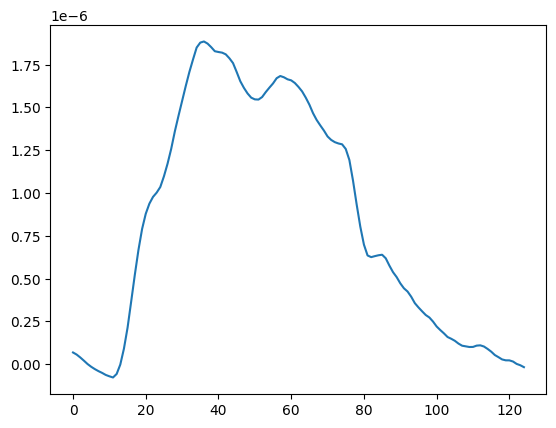

: 

In [14]:
import matplotlib.pyplot as plt 
plt.plot(np.mean(hb_simple_3d[..., 2], axis=(0,1)))

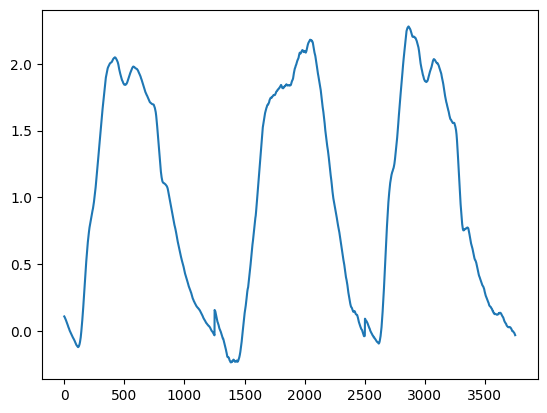

In [101]:
from scipy.stats import zscore
tmp = np.mean(hb_data_all, axis=(0,1))
plt.plot(tmp)

1.166637521014497e-06


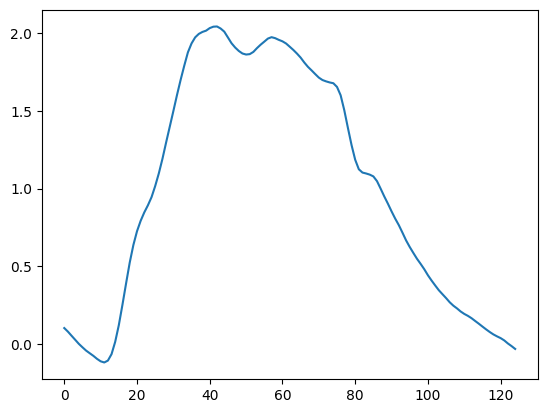

In [97]:
tmp = np.load('/Users/shanxiafeng/Documents/Project/Research/fnirs-prognosis/code/fnirs-treatment-response-prediction/allData/diagnosis458/hb_data.npy')
print(np.mean(tmp))

tmp/=np.mean(tmp)

plt.plot(np.mean(tmp, axis=(0,1)))

In [53]:
a = np.arange(0, 32)
delete_index = 4
b = np.delete(a, delete_index)
print(b)

[ 0  1  2  3  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31]


In [47]:
np_all_label.shape

(374,)

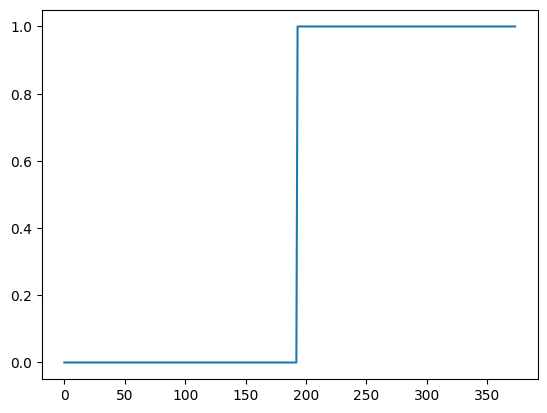

In [42]:
import matplotlib.pyplot as plt

np_all_label = np.array(label[:, 0])

plt.plot(np_all_label)